In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt, freqz
import warnings
from funcoes import fft_dec, zero_padding, overlap_add
warnings.filterwarnings('ignore')

# Análise do Sinal (Alicar a FFT para Identificar Componentes)

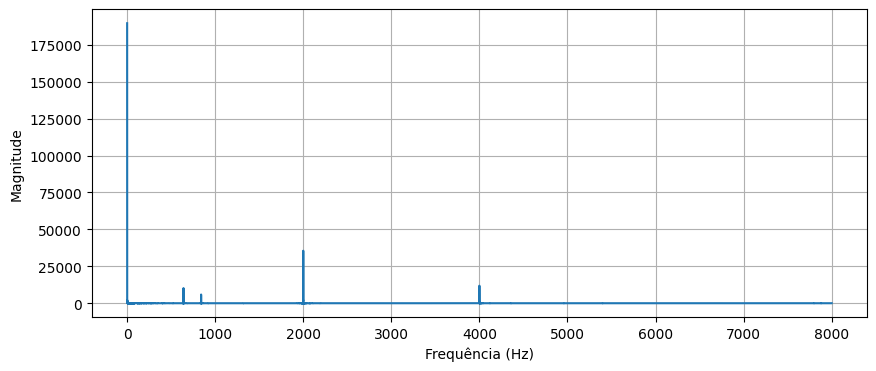

In [7]:
# Carregar o sinal
fs, x = wavfile.read('sinal_1.wav')  # fs = 16 kHz (taxa de amostragem)
x = x / np.max(np.abs(x))  # Normaliza o sinal

# FFT
x = zero_padding(x)
X = fft_dec(x)
N = len(x)
freqs = np.fft.fftfreq(N, d=1/fs)
freqs_pos = freqs[:N//2] # Frequências positivas (0 a fs/2)
magnitude = np.abs(X[:N//2])

plt.figure(figsize=(10, 4))
plt.plot(freqs_pos, magnitude)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
#plt.xlim([500, 1000])
plt.grid(True)
plt.show()

In [ ]:
# Parâmetros dos filtros
order = 4  # Ordem dos filtros Butterworth
nyquist = fs / 2

# Componentes a serem separadas
components = {
    'DC': 0,
    '640Hz': 640,
    '840Hz': 840,
    '2000Hz': 2000,
    '4000Hz': 4000
}

filters = {}

In [9]:
# Filtro para componente DC (passa-baixas com corte baixo)
cutoff_dc = 1  # 1 Hz para capturar DC
b_dc, a_dc = butter(order, cutoff_dc/nyquist, btype='low')
filters['DC'] = (b_dc, a_dc)

# Filtros passa-banda para as demais componentes
bandwidth = 50  # Largura de banda ±50 Hz

for name, freq in components.items():
    if freq > 0:  # Filtros passa-banda para frequências > 0
        low_cut = (freq - bandwidth) / nyquist
        high_cut = (freq + bandwidth) / nyquist
        b, a = butter(order, [low_cut, high_cut], btype='band')
        filters[name] = (b, a)



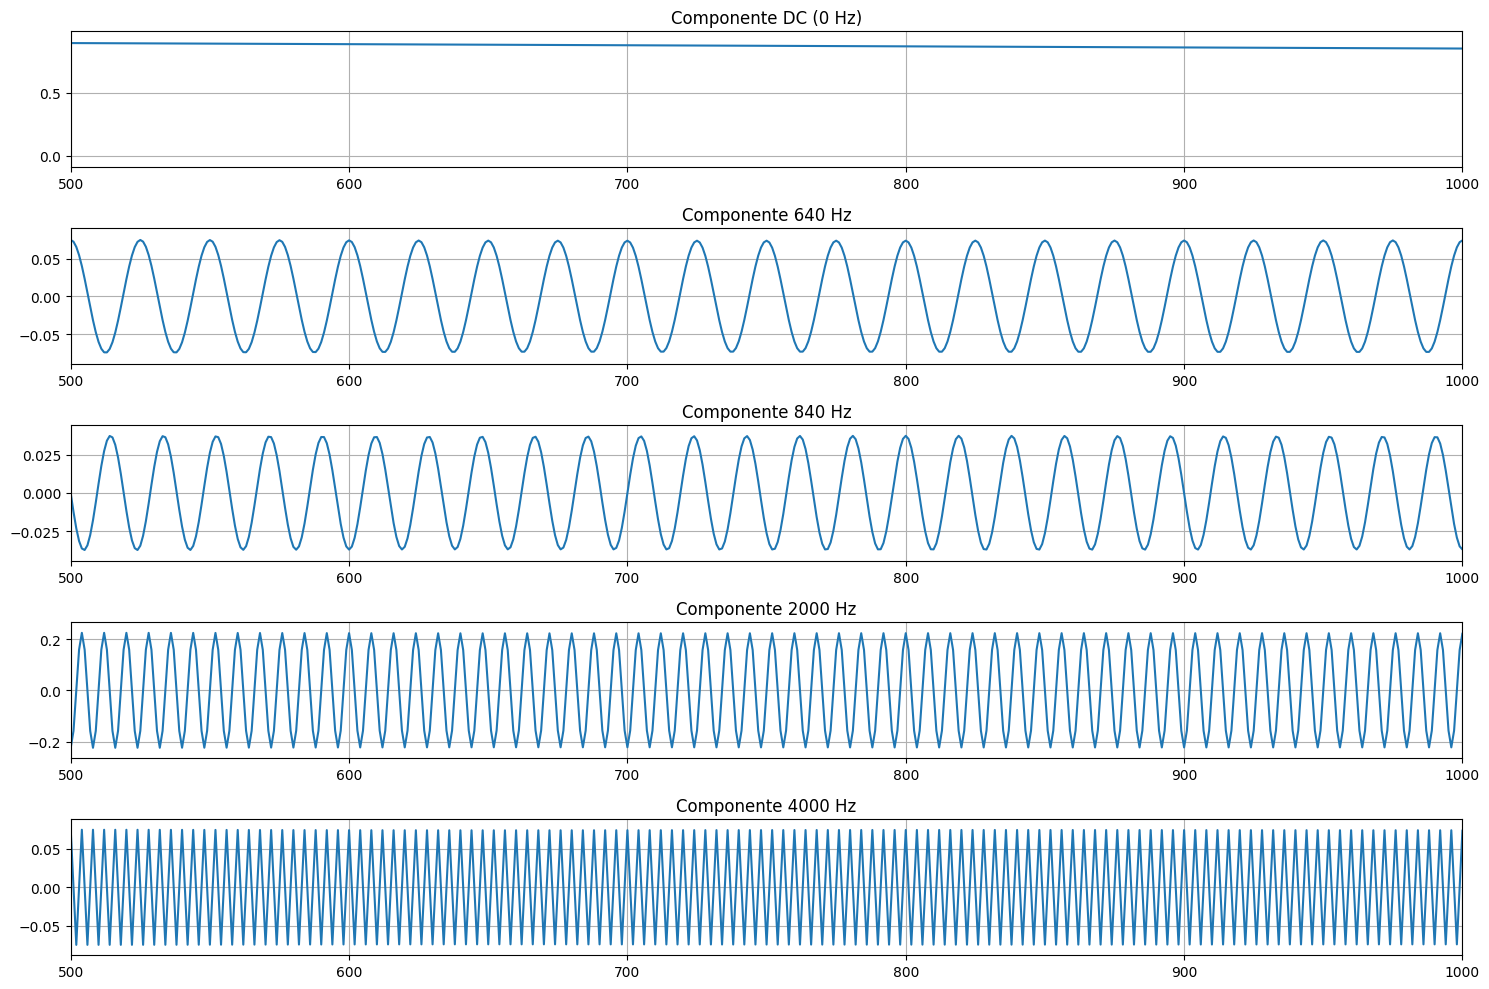

In [11]:
# Aplicar os filtros
filtered_signals = {}
for name, (b, a) in filters.items():
    filtered_signals[name] = filtfilt(b, a, x)

plt.figure(figsize=(15, 10))

# DC
plt.subplot(5, 1, 1)
plt.plot(filtered_signals['DC'])
plt.title('Componente DC (0 Hz)')
plt.xlim([500, 1000])
plt.grid(True)

# 640 Hz
plt.subplot(5, 1, 2)
plt.plot(filtered_signals['640Hz'])
plt.title('Componente 640 Hz')
plt.xlim([500, 1000])
plt.grid(True)

# 840 Hz
plt.subplot(5, 1, 3)
plt.plot(filtered_signals['840Hz'])
plt.title('Componente 840 Hz')
plt.xlim([500, 1000])
plt.grid(True)

# 2000 Hz
plt.subplot(5, 1, 4)
plt.plot(filtered_signals['2000Hz'])
plt.title('Componente 2000 Hz')
plt.xlim([500, 1000])
plt.grid(True)

# 4000 Hz
plt.subplot(5, 1, 5)
plt.plot(filtered_signals['4000Hz'])
plt.title('Componente 4000 Hz')
plt.xlim([500, 1000])
plt.grid(True)

plt.tight_layout()
plt.show()



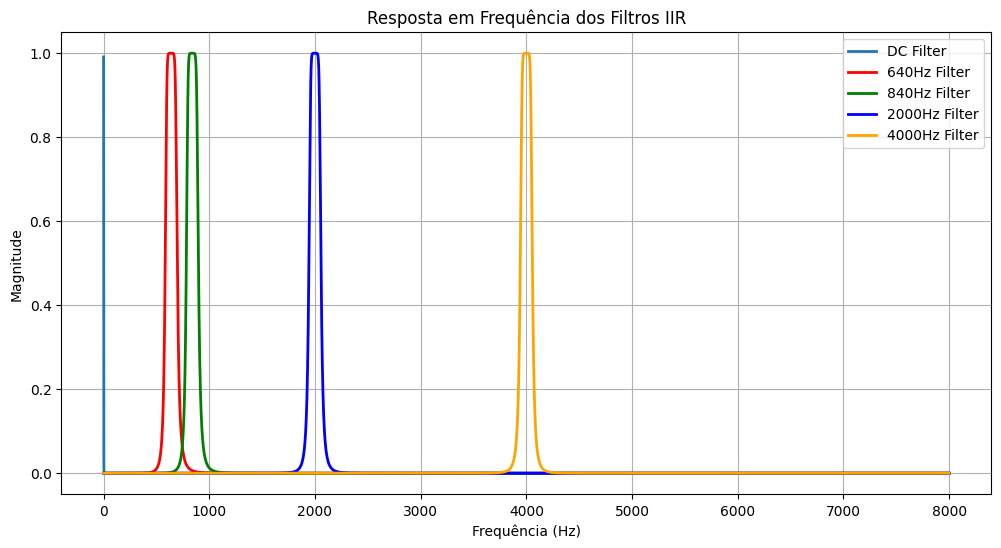

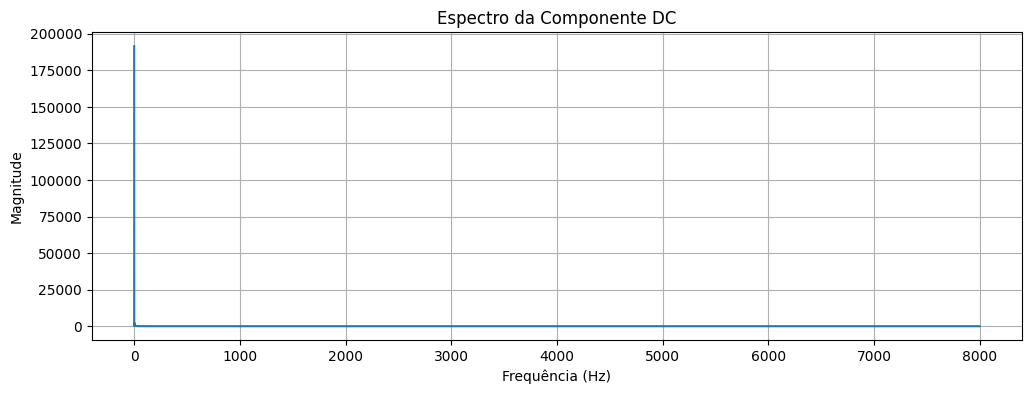

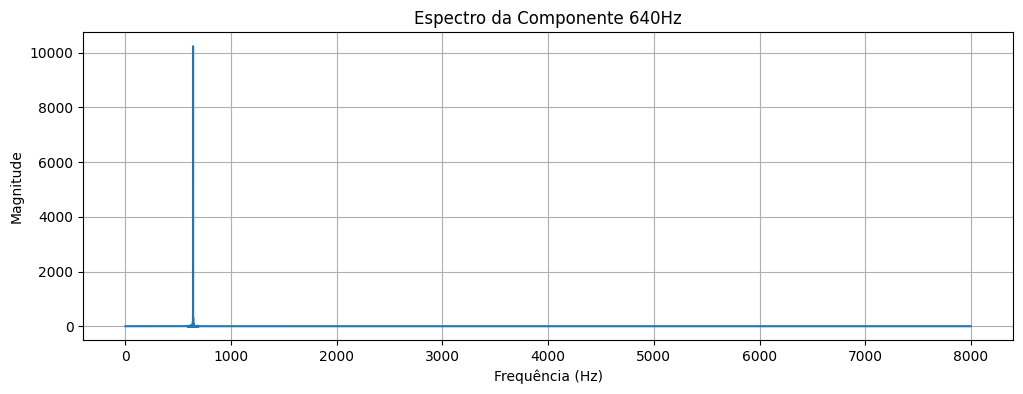

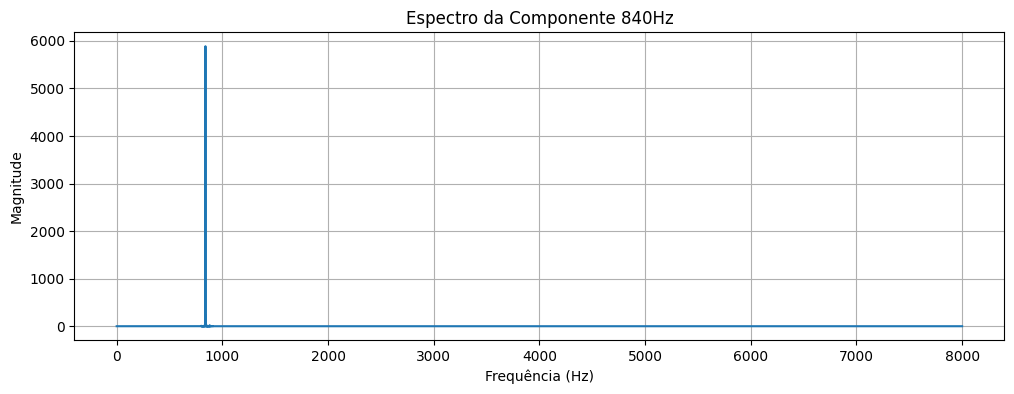

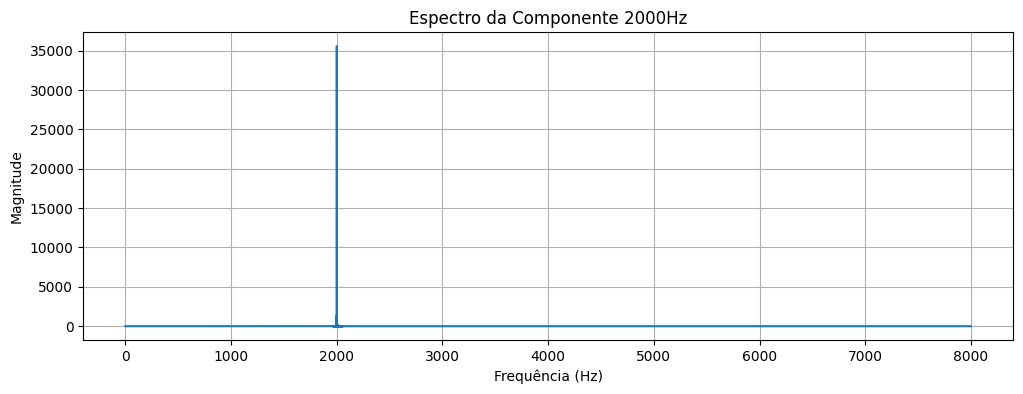

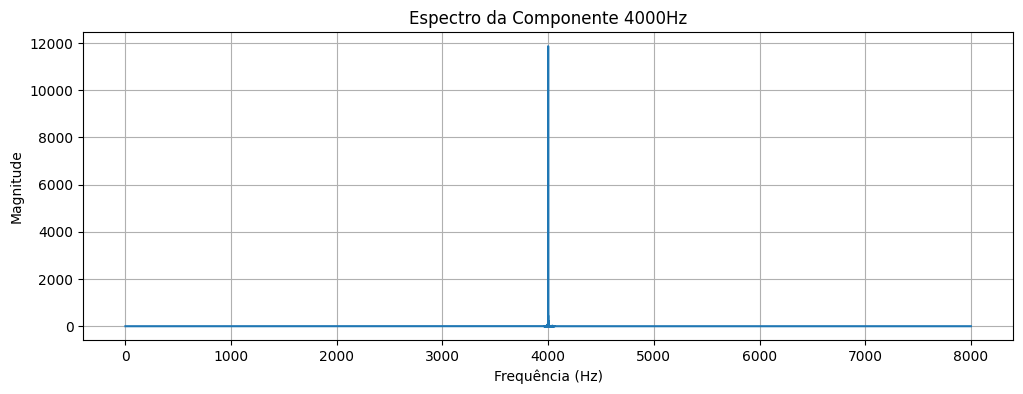

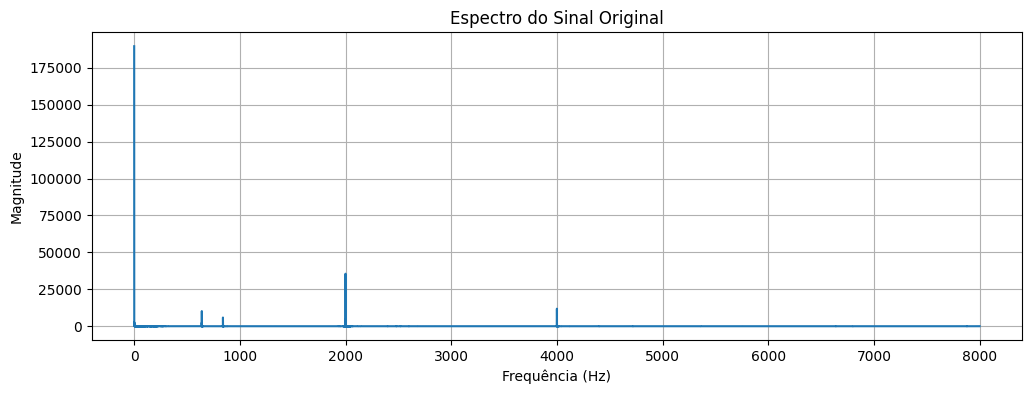

In [18]:
# resposta em frequência dos filtros
plt.figure(figsize=(12, 6))

# Filtro DC
w, h = freqz(*filters['DC'], worN=8000, fs=fs)
plt.plot(w, np.abs(h), label='DC Filter', linewidth=2)

# Filtros passa-banda
colors = ['red', 'green', 'blue', 'orange']
for i, (name, (b, a)) in enumerate(filters.items()):
    if name != 'DC':
        w, h = freqz(b, a, worN=8000, fs=fs)
        plt.plot(w, np.abs(h), label=f'{name} Filter', 
                color=colors[i-1], linewidth=2)

plt.title('Resposta em Frequência dos Filtros IIR')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

def plot_fft(signal, title, fs):
    N = len(signal)
    freqs = np.fft.fftfreq(N, d=1/fs)[:N//2]
    magnitude = np.abs(np.fft.fft(signal)[:N//2])
    
    plt.figure(figsize=(12, 4))
    plt.plot(freqs, magnitude)
    plt.title(title)
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

# FFT de cada componente separada
for name, signal in filtered_signals.items():
    plot_fft(signal, f'Espectro da Componente {name}', fs)

# FFT do sinal original para comparação
plot_fft(x, 'Espectro do Sinal Original', fs)